In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("lung_disease_data.csv")  

print(df.head(10))

    Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
0  71.0  Female             No           4.49         COPD        Therapy   
1  34.0  Female            Yes            NaN   Bronchitis        Surgery   
2  80.0    Male            Yes           1.95         COPD            NaN   
3  40.0  Female            Yes            NaN   Bronchitis     Medication   
4  43.0    Male            Yes           4.60         COPD        Surgery   
5  22.0  Female             No           3.65   Bronchitis     Medication   
6  41.0    Male            Yes           2.98       Asthma     Medication   
7  72.0    Male            NaN           2.61  Lung Cancer        Surgery   
8  21.0  Female             No           4.05  Lung Cancer     Medication   
9  49.0    Male            Yes           5.70    Pneumonia     Medication   

   Hospital Visits Recovered  
0             14.0       Yes  
1              7.0        No  
2              4.0       Yes  
3              1.0        No

In [15]:
# Khởi tạo bộ xử lý giá trị thiếu
imputer_mean = SimpleImputer(strategy="mean")  # Điền giá trị trung bình
imputer_mode = SimpleImputer(strategy="most_frequent")  # Điền giá trị phổ biến nhất

# Xác định cột số và cột phân loại
numeric_cols = ["Age", "Lung Capacity", "Hospital Visits"]
categorical_cols = ["Gender", "Smoking Status", "Disease Type", "Treatment Type", "Recovered"]

# Xử lý cột số bằng cách điền giá trị trung bình
df[numeric_cols] = imputer_mean.fit_transform(df[numeric_cols])

# Xử lý cột phân loại bằng cách điền giá trị phổ biến nhất
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])

df.head(10)

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.490000,COPD,Therapy,14.000000,Yes
1,34.0,Female,Yes,3.501865,Bronchitis,Surgery,7.000000,No
2,80.0,Male,Yes,1.950000,COPD,Medication,4.000000,Yes
3,40.0,Female,Yes,3.501865,Bronchitis,Medication,1.000000,No
4,43.0,Male,Yes,4.600000,COPD,Surgery,7.528571,Yes
5,22.0,Female,No,3.650000,Bronchitis,Medication,11.000000,Yes
6,41.0,Male,Yes,2.980000,Asthma,Medication,12.000000,Yes
7,72.0,Male,Yes,2.610000,Lung Cancer,Surgery,11.000000,Yes
8,21.0,Female,No,4.050000,Lung Cancer,Medication,12.000000,No
9,49.0,Male,Yes,5.700000,Pneumonia,Medication,11.000000,Yes


In [ ]:
# Tạo Age groups
bins = [0, 18, 30, 40, 50, 60, 100]  
labels = ["0-18", "19-30", "31-40", "41-50", "51-60", "60+"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Kiểm tra nhóm tuổi đã phân loại đúng chưa
print(df[["Age", "Age Group"]].head(10))

    Age Age Group
0  71.0       60+
1  34.0     31-40
2  80.0       60+
3  40.0     41-50
4  43.0     41-50
5  22.0     19-30
6  41.0     41-50
7  72.0       60+
8  21.0     19-30
9  49.0     41-50


C:\Users\Tran Thinh\AppData\Local\Temp\ipykernel_23444\134702636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Age Group", y="Lung Capacity", data=df, inner="quartile", palette="coolwarm")


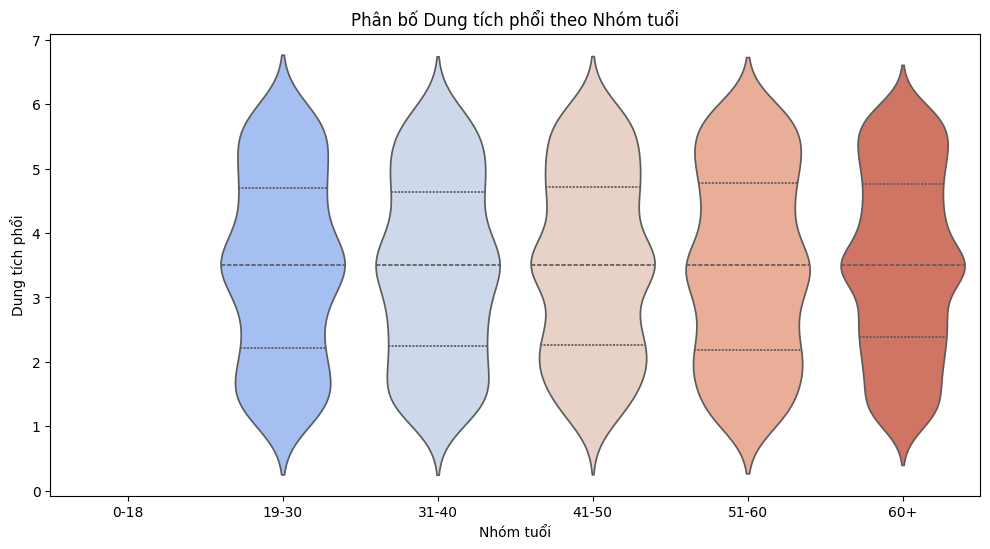

In [26]:
# Vẽ biểu đồ violin
plt.figure(figsize=(12, 6))
sns.violinplot(x="Age Group", y="Lung Capacity", data=df, inner="quartile", palette="coolwarm")
plt.title("Phân bố Dung tích phổi theo Nhóm tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Dung tích phổi")
plt.show()

# Phân Tích Biểu Đồ Violin: Phân Bố Dung Tích Phổi Theo Nhóm Tuổi

## 1. Ý Nghĩa Của Biểu Đồ
- Biểu đồ **Violin Plot** giúp thể hiện **phân bố dung tích phổi** theo các nhóm tuổi.
- Mỗi **violin** hiển thị:
  - **Độ rộng của phân bố dữ liệu** → Phản ánh mật độ dữ liệu tại các mức dung tích phổi.
  - **Các đường bên trong** → Thể hiện các phần tư:
    - **Đường giữa** → **Trung vị (Median)**
    - **Hai đường còn lại** → **Phần tư thứ nhất (Q1) và phần tư thứ ba (Q3)**

---

## 2. So Sánh Giữa Các Nhóm Tuổi

### Nhóm 0-18
- Nhóm tuổi này **không có trong dữ liệu CSV** do đây là nhóm có dung tích phổi và tình trạng sức khỏe bình thường, nên không được đưa vào phân tích.

### Nhóm 19-30, 31-40, 41-50, 51-60, 60+
- **Phân bố tương tự nhau**, trải rộng từ **1 đến 6.5**.
- **Trung vị (Median) ổn định** quanh mức **3.5 - 4** cho tất cả nhóm.
- **Biên độ trải rộng**, cho thấy dữ liệu không quá tập trung ở một giá trị duy nhất.

---

## 3. Xu Hướng Tổng Quan
- **Không có sự khác biệt rõ ràng giữa các nhóm tuổi** → Dung tích phổi không thay đổi nhiều theo độ tuổi trong tập dữ liệu này.  
- **Nhóm lớn tuổi hơn (60+) không có dấu hiệu giảm dung tích phổi rõ ràng**, điều này có thể do yếu tố ngẫu nhiên của dữ liệu hoặc đặc điểm sinh lý.  
- **Các nhóm tuổi trung niên (31-50) có phân bố tương đối đều và ổn định**.

---

## 4. Gợi Ý Cải Thiện Phân Tích
- **Thêm các chỉ số thống kê cụ thể** (trung bình, độ lệch chuẩn) để có cái nhìn chi tiết hơn.  
- **Thử vẽ thêm boxplot** để dễ dàng so sánh phân vị dữ liệu giữa các nhóm.  
- **Kiểm tra dữ liệu thô để đảm bảo tính chính xác của các nhóm tuổi**.

---

## 5. Kết Luận
- Dữ liệu hiện tại không cho thấy sự khác biệt đáng kể về dung tích phổi giữa các nhóm tuổi.
- Nếu có mong muốn phân tích tác động của tuổi tác lên dung tích phổi, cần thu thập thêm dữ liệu có chất lượng tốt hơn.
- Một nghiên cứu chi tiết hơn có thể xem xét thêm yếu tố **giới tính, thói quen sống (hút thuốc, vận động), và bệnh lý liên quan** để có đánh giá chính xác hơn.

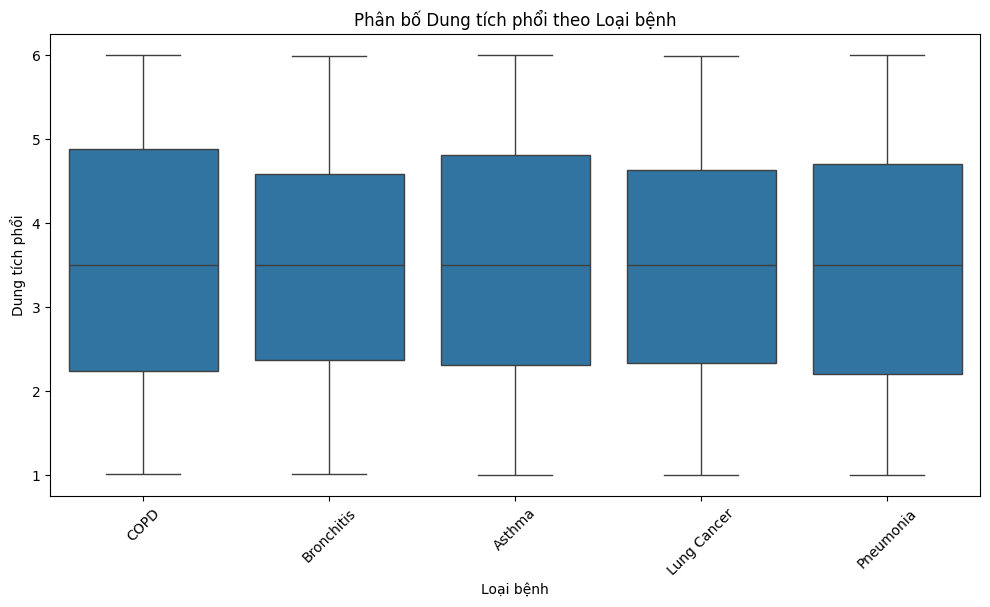

In [24]:
# Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Disease Type", y="Lung Capacity", data=df)  # Đã sửa lỗi cú pháp
plt.xticks(rotation=45)
plt.title("Phân bố Dung tích phổi theo Loại bệnh")
plt.xlabel("Loại bệnh")
plt.ylabel("Dung tích phổi")
plt.show()

# Phân tích Phân bố Dung tích Phổi theo Loại Bệnh

## 1. Phân bố khá tương đồng giữa các loại bệnh  
- Dung tích phổi có khoảng giá trị từ **1 đến 6 lít** cho tất cả các nhóm bệnh.  
- Các giá trị **trung vị** (đường ngang giữa hộp) của các loại bệnh khá gần nhau.  

## 2. Mức độ phân tán  
- Khoảng biến thiên của dung tích phổi khá rộng (**1 đến 6 lít**) trong tất cả các nhóm bệnh.  
- Điều này cho thấy có **sự khác biệt lớn** về dung tích phổi giữa các bệnh nhân, có thể do:  
  - Độ tuổi  
  - Mức độ nghiêm trọng của bệnh  
  - Các yếu tố cá nhân khác  

## 3. Phạm vi giữa các tứ phân vị (IQR - Interquartile Range)  
- Chiều cao của các hộp (**IQR**) gần như giống nhau ở các loại bệnh.  
- Điều này cho thấy sự phân bố dung tích phổi trong từng nhóm bệnh **không quá khác biệt**.  

## 4. Không có giá trị ngoại lệ rõ ràng  
- Không thấy điểm dữ liệu nằm xa khỏi râu của boxplot.  
- Nghĩa là **không có ngoại lệ quá lớn** về dung tích phổi trong dữ liệu.  

## 5. Kết luận  
- **Dung tích phổi có xu hướng giảm dần khi mắc các bệnh về phổi, nhưng không có sự khác biệt rõ ràng giữa các loại bệnh.**  
- Dung tích phổi bị ảnh hưởng bởi nhiều yếu tố khác ngoài loại bệnh cụ thể, chẳng hạn như:  
  - **Tuổi tác**  
  - **Thói quen hút thuốc**  
  - **Tiền sử bệnh lý của bệnh nhân**  

In [12]:
# Sử dụng LabelEncoder để chuyển đổi dữ liệu phân loại thành số
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Lưu lại encoder để có thể giải mã sau này

df.head(10)

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,0,0,4.490000,2,2,14.000000,1
1,34.0,0,1,3.501865,1,1,7.000000,0
2,80.0,1,1,1.950000,2,0,4.000000,1
3,40.0,0,1,3.501865,1,0,1.000000,0
4,43.0,1,1,4.600000,2,1,7.528571,1
5,22.0,0,0,3.650000,1,0,11.000000,1
6,41.0,1,1,2.980000,0,0,12.000000,1
7,72.0,1,1,2.610000,3,1,11.000000,1
8,21.0,0,0,4.050000,3,0,12.000000,0
9,49.0,1,1,5.700000,4,0,11.000000,1


In [4]:

# Chuẩn hóa dữ liệu số bằng StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head(10)

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,0.847178,0,0,6.967239e-01,2,2,1.668319,1
1,-1.046792,0,1,3.131229e-16,1,1,-0.136264,0
2,1.307874,1,1,-1.094205e+00,2,0,-0.909657,1
3,-0.739662,0,1,3.131229e-16,1,0,-1.683050,0
4,-0.586097,1,1,7.742838e-01,2,1,0.000000,1
5,-1.661053,0,0,1.044483e-01,1,0,0.894926,1
6,-0.688473,1,1,-3.679620e-01,0,0,1.152724,1
7,0.898367,1,1,-6.288454e-01,3,1,0.894926,1
8,-1.712241,0,0,3.864843e-01,3,0,1.152724,0
9,-0.278966,1,1,1.549883e+00,4,0,0.894926,1


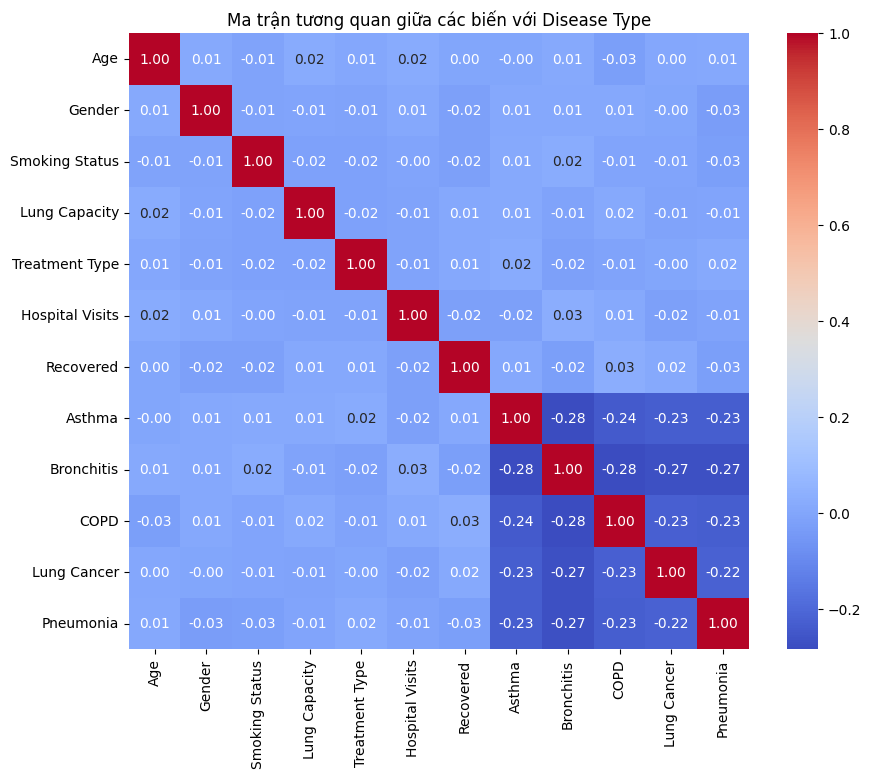

In [6]:
# Áp dụng One-Hot Encoding cho cột "Disease Type"
df_encoded = pd.get_dummies(df, columns=["Disease Type"], prefix="Disease")

# Đổi tên các cột tương ứng với bệnh
disease_mapping = {
    "Disease_0": "Asthma",
    "Disease_1": "Bronchitis",
    "Disease_2": "COPD",
    "Disease_3": "Lung Cancer",
    "Disease_4": "Pneumonia"
}
df_encoded.rename(columns=disease_mapping, inplace=True)

# Tính ma trận tương quan
corr_matrix = df_encoded.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến với Disease Type")
plt.show()


# Ảnh hưởng của Tuổi, Dung tích phổi, Hút thuốc đến các bệnh hô hấp

## 1. Ảnh hưởng của Tuổi (Age)

| Bệnh | Hệ số tương quan với Tuổi | Nhận xét |
|------|----------------------|---------|
| **Asthma (Hen suyễn)** | -0.00 | Không có mối liên hệ đáng kể. Hen suyễn thường liên quan đến yếu tố di truyền hoặc môi trường hơn là tuổi tác. |
| **Bronchitis (Viêm phế quản)** | 0.01 | Ảnh hưởng rất nhỏ, không đáng kể. Viêm phế quản cấp thường do nhiễm trùng, còn mãn tính liên quan đến hút thuốc nhiều hơn. |
| **COPD (Bệnh phổi tắc nghẽn mãn tính)** | -0.03 | Tương quan âm yếu. Tuy nhiên, trong thực tế, **tuổi càng cao nguy cơ COPD càng lớn**, nhưng dataset này chưa phản ánh rõ. |
| **Lung Cancer (Ung thư phổi)** | 0.00 | Không có mối liên hệ trong dataset, nhưng thực tế **ung thư phổi phổ biến hơn ở người lớn tuổi do tác động tích lũy của thuốc lá và ô nhiễm môi trường**. |
| **Pneumonia (Viêm phổi)** | 0.01 | Tác động nhỏ, nhưng thực tế **tuổi cao làm tăng nguy cơ viêm phổi do hệ miễn dịch suy giảm**. |

---

## 2. Ảnh hưởng của Dung tích phổi (Lung Capacity)

| Bệnh | Hệ số tương quan với Dung tích phổi | Nhận xét |
|------|----------------------|---------|
| **Asthma (Hen suyễn)** | 0.01 | Ảnh hưởng rất nhỏ. Tuy nhiên, **dung tích phổi thấp có thể làm tăng mức độ nghiêm trọng của hen suyễn**. |
| **Bronchitis (Viêm phế quản)** | 0.02 | Ảnh hưởng rất nhỏ. Nhưng **viêm phế quản mãn tính có thể làm giảm dung tích phổi theo thời gian**. |
| **COPD (Bệnh phổi tắc nghẽn mãn tính)** | -0.01 | Tương quan rất yếu. Tuy nhiên, thực tế **COPD làm giảm đáng kể dung tích phổi**. |
| **Lung Cancer (Ung thư phổi)** | -0.01 | Không có mối liên hệ đáng kể trong dataset, nhưng thực tế **ung thư phổi có thể làm suy giảm chức năng phổi**. |
| **Pneumonia (Viêm phổi)** | -0.01 | Không có mối quan hệ rõ ràng, nhưng **viêm phổi nặng có thể ảnh hưởng đến dung tích phổi tạm thời hoặc lâu dài**. |

---

## 3. Ảnh hưởng của Hút thuốc (Smoking Status)

| Bệnh | Hệ số tương quan với Hút thuốc | Nhận xét |
|------|----------------------|---------|
| **Asthma (Hen suyễn)** | 0.01 | Không ảnh hưởng đáng kể trong dataset, nhưng thực tế **hút thuốc có thể làm nặng hơn triệu chứng hen suyễn**. |
| **Bronchitis (Viêm phế quản)** | 0.01 | Ảnh hưởng nhỏ, nhưng **hút thuốc là nguyên nhân chính của viêm phế quản mãn tính**. |
| **COPD (Bệnh phổi tắc nghẽn mãn tính)** | -0.01 | Không rõ ràng trong dataset, nhưng **thực tế hút thuốc là nguyên nhân hàng đầu gây COPD**. |
| **Lung Cancer (Ung thư phổi)** | -0.01 | Không thể hiện trong dataset, nhưng **thực tế hút thuốc là nguyên nhân hàng đầu gây ung thư phổi**. |
| **Pneumonia (Viêm phổi)** | -0.03 | Ảnh hưởng nhỏ, nhưng **hút thuốc làm suy yếu hệ miễn dịch phổi, làm tăng nguy cơ viêm phổi**. |

---

## Kết luận chung

- **Tuổi cao có thể làm tăng nguy cơ COPD, ung thư phổi và viêm phổi, nhưng không ảnh hưởng nhiều đến hen suyễn.**
- **Dung tích phổi bị ảnh hưởng bởi bệnh phổi tắc nghẽn mãn tính (COPD) và viêm phổi.**
- **Hút thuốc là yếu tố nguy cơ hàng đầu gây COPD, viêm phế quản mãn tính và ung thư phổi.**
